In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
crd=pd.read_csv("/content/CreditCardBalance.csv")

In [38]:
crd.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [39]:
crd.shape

(400, 12)

In [40]:
crd.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

In [41]:
crd.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [42]:
#Drop unwanted columns

In [43]:
crd.drop(columns=["Unnamed: 0"], inplace=True)

In [44]:
crd

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [45]:
#Clean corrupted column

In [46]:
crd['Age'].sort_values(ascending=False)

323    98
209    91
128    89
139    87
7      87
       ..
272    25
392    24
152    24
43     24
335    23
Name: Age, Length: 400, dtype: int64

In [47]:
crd.Age.value_counts()

44    13
66    13
50    12
47    11
57    10
      ..
85     1
91     1
86     1
98     1
23     1
Name: Age, Length: 68, dtype: int64

In [48]:
crd.Age=crd.Age.map(lambda age: np.nan if age == '?' else int(age))

In [49]:
crd.dtypes


Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

<ipython-input-50-be557ee5ff5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crd.corr())


<Axes: >

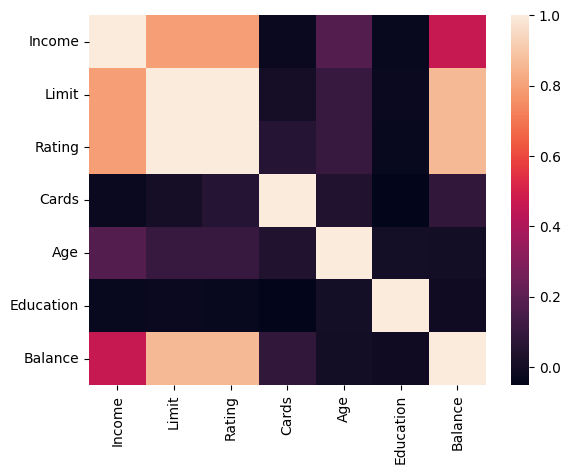

In [50]:
sns.heatmap(crd.corr())

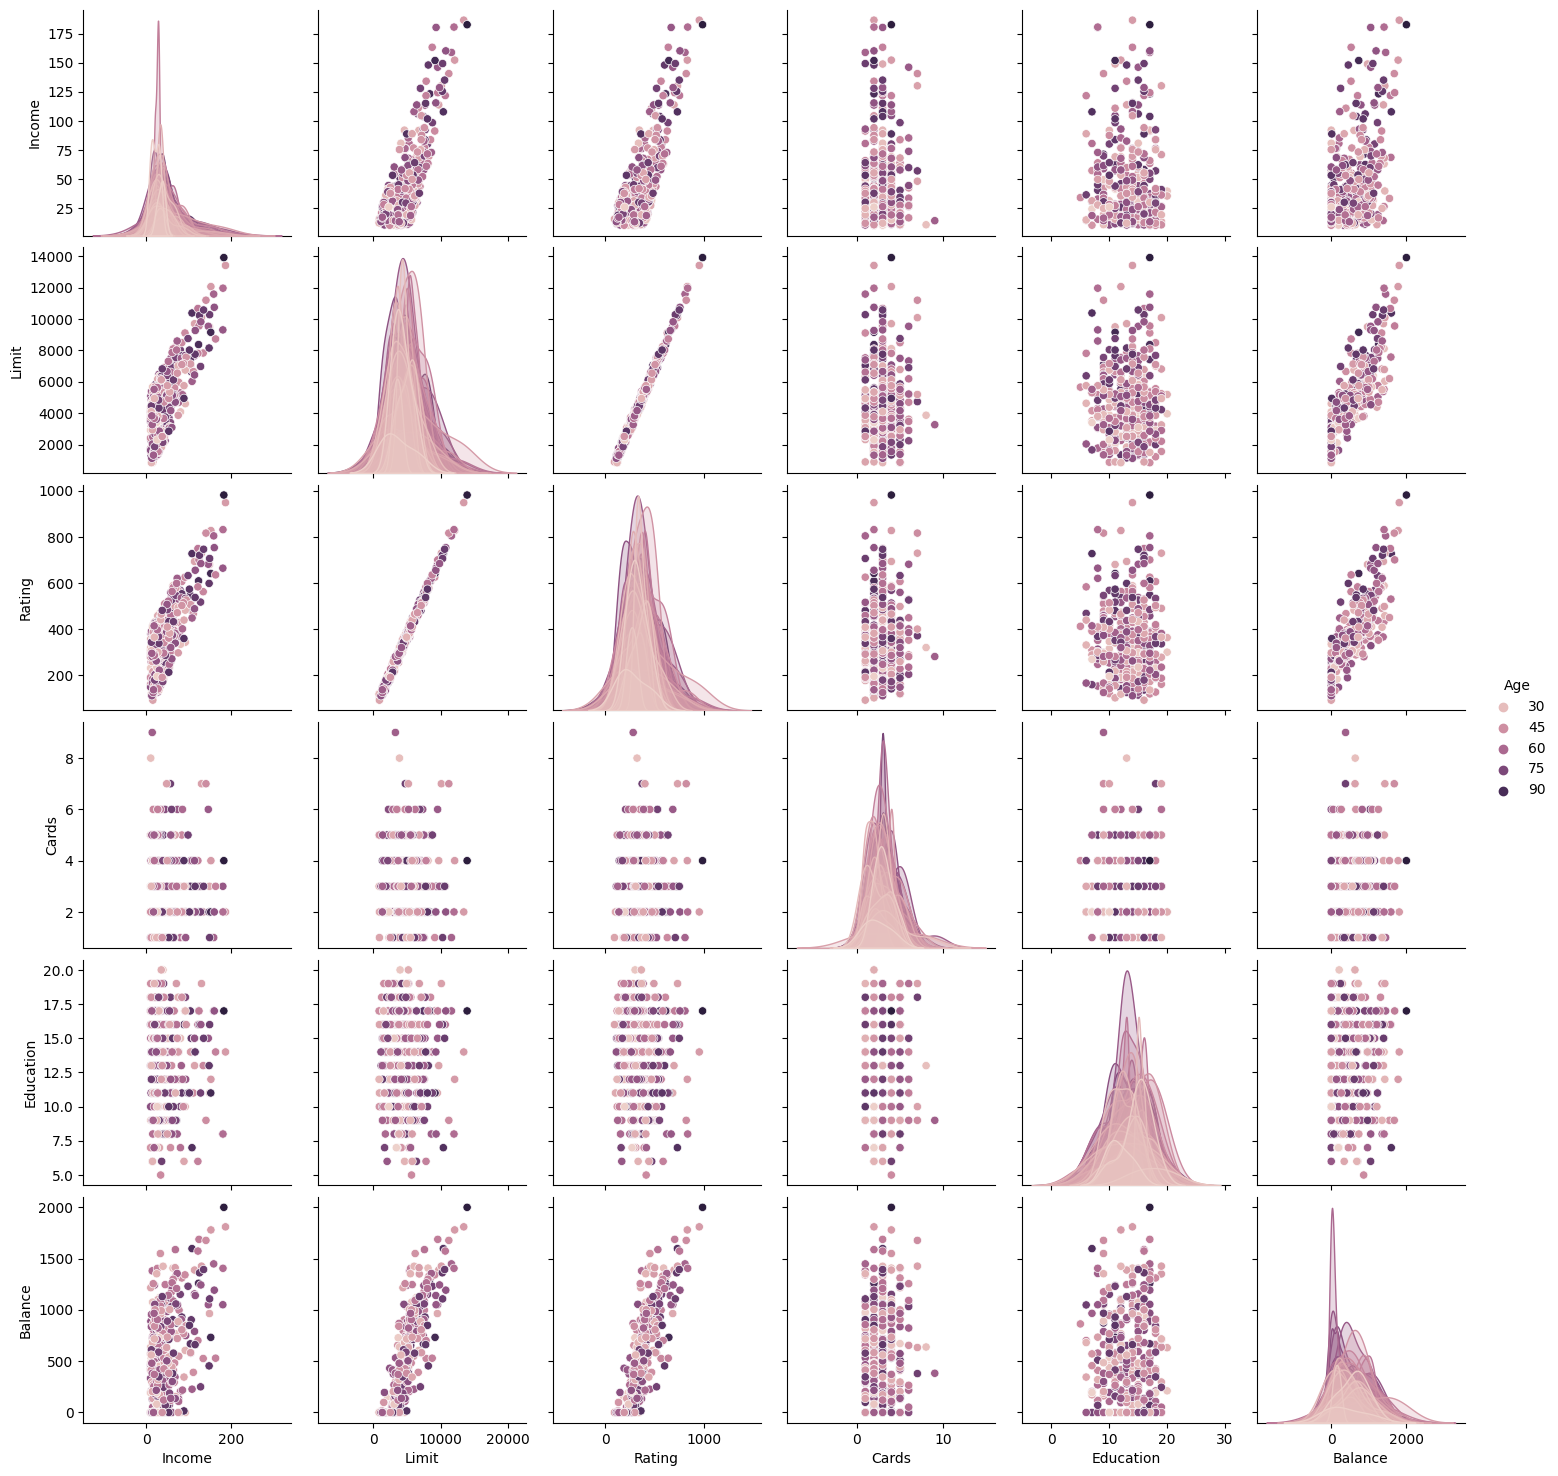

In [51]:
sns.pairplot(crd,hue="Age")

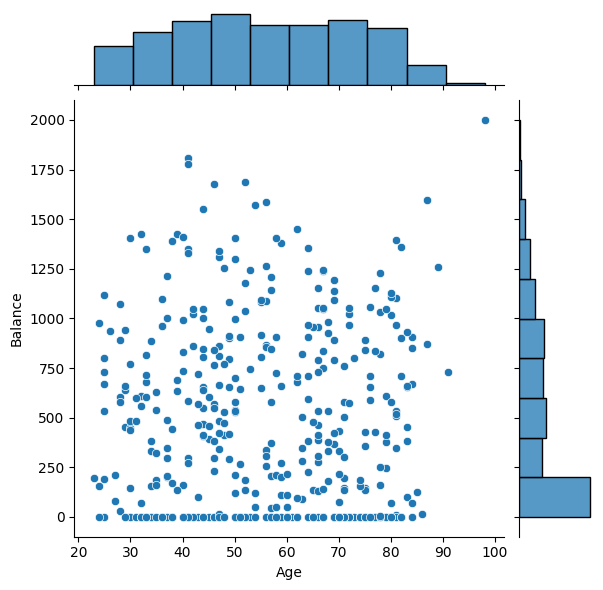

In [52]:
sns.jointplot(x="Age",y="Balance",data=crd)
plt.show()

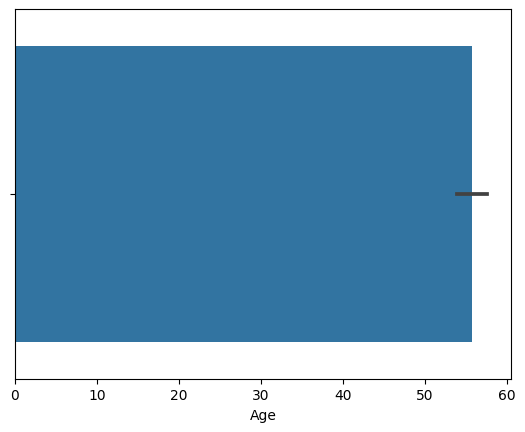

In [53]:
sns.barplot(x="Age",data=crd)
plt.show()

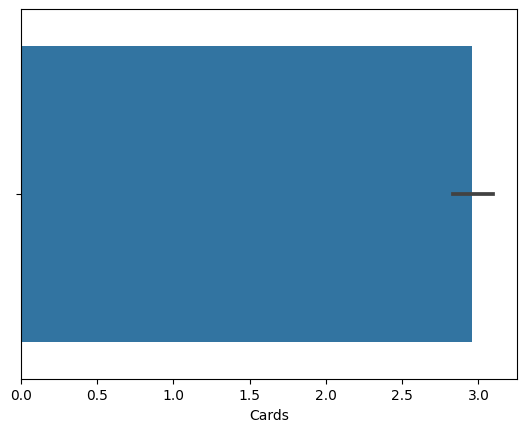

In [54]:
sns.barplot(x="Cards",data=crd)
plt.show()

In [55]:
###   NO NULL VALUES IN THIS DATASET

In [56]:
#Make the column names more descriptive

In [57]:
# Dictionary Method
new_columns_dict = {
    "Income":"income","Limit":"limit","Limit Rating":"limit rating","Cards":"cards","Age":"age","Education":"education","Gender":"gender","Students":"students","Married":"married","Ethnicity":"ethnicity","Balance":"balance",
}

crd.rename(columns= new_columns_dict,inplace=True)

In [68]:
crd.rename(columns= new_columns_dict,inplace=True)

In [58]:
crd.columns

Index(['income', 'limit', 'Rating', 'cards', 'age', 'education', 'gender',
       'Student', 'married', 'ethnicity', 'balance'],
      dtype='object')

In [59]:
crd.head()

,income,limit,Rating,cards,age,education,gender,Student,married,ethnicity,balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [60]:
crd.describe()

,income,limit,Rating,cards,age,education,balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [61]:
crd.groupby('balance').mean().T # T means transpose

<ipython-input-61-e73aa361dac3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crd.groupby('balance').mean().T # T means transpose


balance,0,5,8,15,16,29,47,50,52,68,...,1448,1549,1573,1587,1597,1677,1687,1779,1809,1999
income,28.823589,16.279,44.473,88.83,20.918,33.017,34.537,34.95,21.004,17.392,...,158.889,33.437,121.834,68.713,107.841,140.672,124.29,152.298,186.634,182.728
limit,2152.722222,1160.000,3500.000,4952.00,1233.000,3180.000,3271.000,3327.00,2836.000,2748.000,...,11589.000,6207.000,10673.000,7582.000,10384.000,11200.000,9560.00,12066.000,13414.000,13913.000
Rating,182.333333,126.000,257.000,360.00,128.000,224.000,250.000,253.00,225.500,228.000,...,805.000,451.000,750.000,531.000,728.000,817.000,701.00,828.000,949.000,982.000
cards,2.822222,3.000,3.000,4.00,3.000,2.000,3.000,3.00,4.500,3.000,...,1.000,4.000,3.000,2.000,3.000,7.000,3.00,4.000,2.000,4.000
age,55.877778,78.000,81.000,86.00,47.000,28.000,57.000,54.00,59.000,32.000,...,62.000,44.000,54.000,56.000,87.000,46.000,52.00,41.000,41.000,98.000
education,13.533333,13.000,16.000,16.00,18.000,16.000,17.000,14.00,18.500,14.000,...,17.000,9.000,16.000,16.000,7.000,9.000,17.00,12.000,14.000,17.000


In [62]:
#Plot variables with potential outliers using boxplots.

<Axes: >

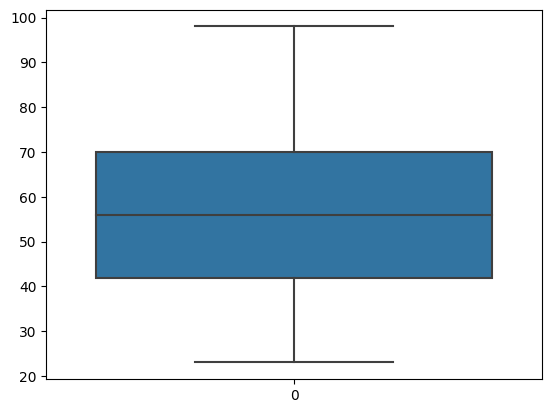

In [63]:
# age

sns.boxplot(crd.age)

In [64]:
##Correlation matrices

In [65]:
crd.corr()

<ipython-input-65-f8dcf78d8c62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crd.corr()


,income,limit,Rating,cards,age,education,balance
income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


<ipython-input-66-e17106e538a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crd.corr(),annot=True)


<Axes: >

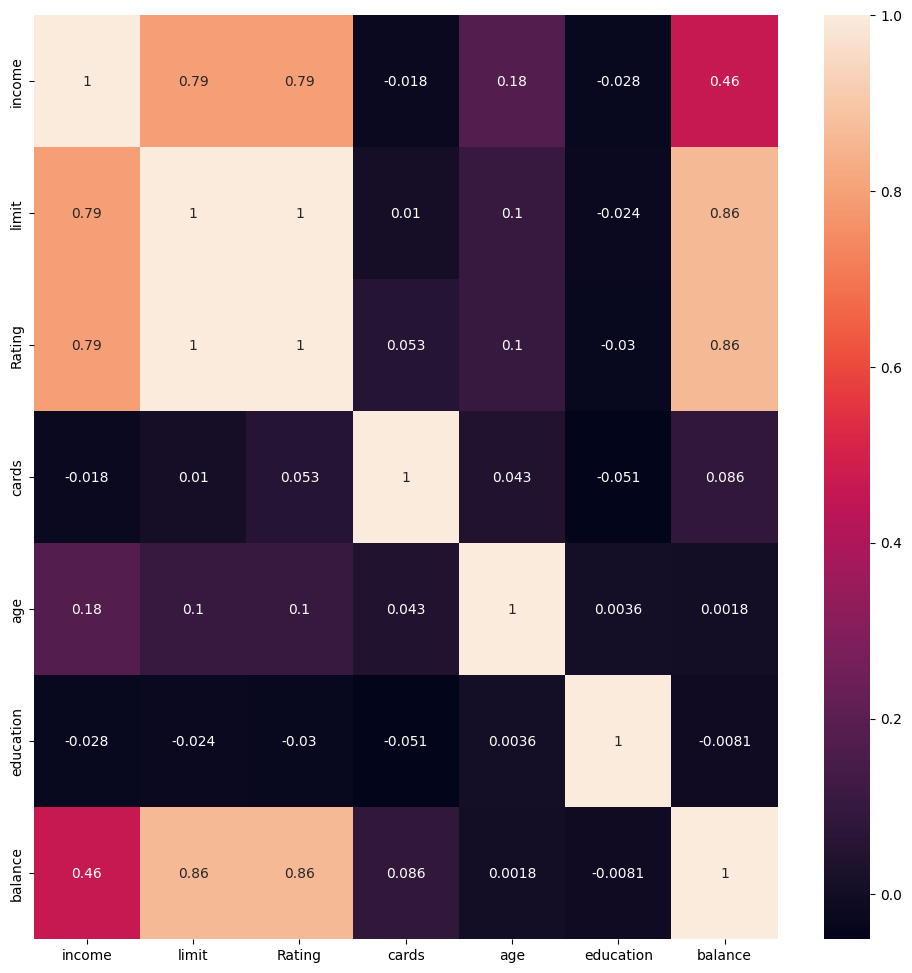

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(crd.corr(),annot=True)